## Alpha Vantage News Transformation and Analysis

In [0]:
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark.sql.types import StringType
from pyspark.sql.functions import udf, lit
from pyspark.sql.functions import col, round
from pyspark.sql import Window
import matplotlib.pyplot as plt
import json

In [0]:
df = spark.read.format("csv") \
  .option("header", "true") \
  .option("sep", ",") \
  .load("/FileStore/tables/output-10.csv")

display(df)

Title,URL,Time Published,Authors,Summary,Banner Image,Source,Category Within Source,Source Domain,Topics,Overall Sentiment Score,Overall Sentiment Label,Ticker Sentiment
History Says the Nasdaq Will Roar Higher in 2024: 2 Surefire Growth Stocks to Buy Now,https://www.fool.com/investing/2024/01/20/history-says-nasdaq-will-roar-higher-in-2024/,20240120,Adria Cimino,Apple and Amazon offer solid growth track records and exciting long-term prospects.,https://g.foolcdn.com/image/?url=https%3A%2F%2Fg.foolcdn.com%2Feditorial%2Fimages%2F761632%2Fgettyimages-171351254.jpg&op=resize&w=700,Motley Fool,n/a,www.fool.com,"[{""topic"":""Economy - Monetary"";""relevance_score"":""0.158519""};{""topic"":""Retail & Wholesale"";""relevance_score"":""0.5""};{""topic"":""Financial Markets"";""relevance_score"":""0.684621""};{""topic"":""Earnings"";""relevance_score"":""0.967645""};{""topic"":""Technology"";""relevance_score"":""0.5""}]",0.365106,Bullish,"[{""ticker"":""AAPL"";""ticker_sentiment_score"":""0.559623"";""ticker_sentiment_label"":""Bullish"";""relevance_score"":""0.427907""};{""ticker"":""AMZN"";""ticker_sentiment_score"":""0.297812"";""ticker_sentiment_label"":""Somewhat-Bullish"";""relevance_score"":""0.465709""}]"
"Apple Watch Sidesteps Looming Ban, Cupertino Giant Outshines Samsung In Sales, Tim Cook Shows BTS Of Vision Pro: This Week In Appleverse - Apple ( NASDAQ:AAPL ) , Masimo ( NASDAQ:MASI )",https://www.benzinga.com/news/24/01/36707332/apple-watch-sidesteps-looming-ban-cupertino-giant-outshines-samsung-in-sales-tim-cook-shows-bts-of-v,20240120,Benzinga Neuro,This past week was buzzing with stories about Apple Inc. AAPL. From securing the pole position in global smartphone shipments to navigating tricky patent disputes the tech giant was nothing short of newsworthy. Here's a quick round-up of what you may have missed over the weekend.,https://cdn.benzinga.com/files/images/story/2024/Apple-Shenzhen-China-media-preview-store_0.jpeg?width=1200&height=800&fit=crop,Benzinga,News,www.benzinga.com,"[{""topic"":""Life Sciences"";""relevance_score"":""0.5""};{""topic"":""Technology"";""relevance_score"":""0.5""}]",0.157793,Somewhat-Bullish,"[{""ticker"":""NFLX"";""ticker_sentiment_score"":""0.339446"";""ticker_sentiment_label"":""Somewhat-Bullish"";""relevance_score"":""0.353059""};{""ticker"":""SSNLF"";""ticker_sentiment_score"":""0.21399"";""ticker_sentiment_label"":""Somewhat-Bullish"";""relevance_score"":""0.091162""};{""ticker"":""MASI"";""ticker_sentiment_score"":""-0.108552"";""ticker_sentiment_label"":""Neutral"";""relevance_score"":""0.353059""};{""ticker"":""AAPL"";""ticker_sentiment_score"":""0.147921"";""ticker_sentiment_label"":""Neutral"";""relevance_score"":""0.830573""}]"
3 Supercharged Tech Stocks to Buy Without Any Hesitation,https://www.fool.com/investing/2024/01/20/3-supercharged-tech-stocks-to-buy-without-hesita/,20240120,Stefon Walters,Even after positive 2023 gains these companies are poised to keep the momentum going.,https://media.ycharts.com/charts/601d0225d1454ec8223f9accc1e2135b.png,Motley Fool,n/a,www.fool.com,"[{""topic"":""IPO"";""relevance_score"":""0.451494""};{""topic"":""Retail & Wholesale"";""relevance_score"":""0.333333""};{""topic"":""Financial Markets"";""relevance_score"":""0.108179""};{""topic"":""Manufacturing"";""relevance_score"":""0.333333""};{""topic"":""Earnings"";""relevance_score"":""0.929393""};{""topic"":""Technology"";""relevance_score"":""0.333333""}]",0.196561,Somewhat-Bullish,"[{""ticker"":""MSFT"";""ticker_sentiment_score"":""0.209677"";""ticker_sentiment_label"":""Somewhat-Bullish"";""relevance_score"":""0.3038""};{""ticker"":""NVDA"";""ticker_sentiment_score"":""0.039959"";""ticker_sentiment_label"":""Neutral"";""relevance_score"":""0.103554""};{""ticker"":""AAPL"";""ticker_sentiment_score"":""0.051773"";""ticker_sentiment_label"":""Neutral"";""relevance_score"":""0.103554""};{""ticker"":""CRWD"";""ticker_sentiment_score"":""0.215508"";""ticker_sentiment_label"":""Somewhat-Bullis

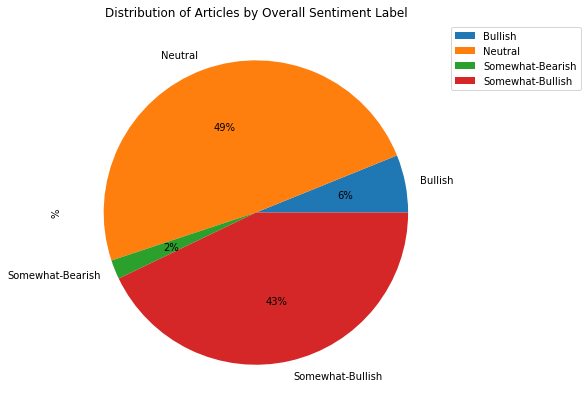

In [0]:
# Grupisanje podataka po ukupnoj sentiment etiketi i brojanje
df2 = df.groupBy("Overall Sentiment Label").count().sort(col("count").desc())\
        .withColumn('%', col('count') / sum('count').over(Window.partitionBy()) * 100)\
        .withColumn("%", round("%", 3))

# Konverzija u Pandas DataFrame za crtanje grafikona
df2 = df2.toPandas()

# Crtanje kružnog dijagrama distribucije članaka po ukupnoj sentiment etiketi
ax = df2.groupby(["Overall Sentiment Label"]).sum().plot(figsize=(14,7), kind='pie', y="%", autopct='%1.0f%%', title="Distribution of Articles by Overall Sentiment Label")
# 'autopct' parametar se koristi za prikazivanje procenta na dijagramu.

# Podešavanje pozicije legende da ne ometa pregled dijagrama.
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

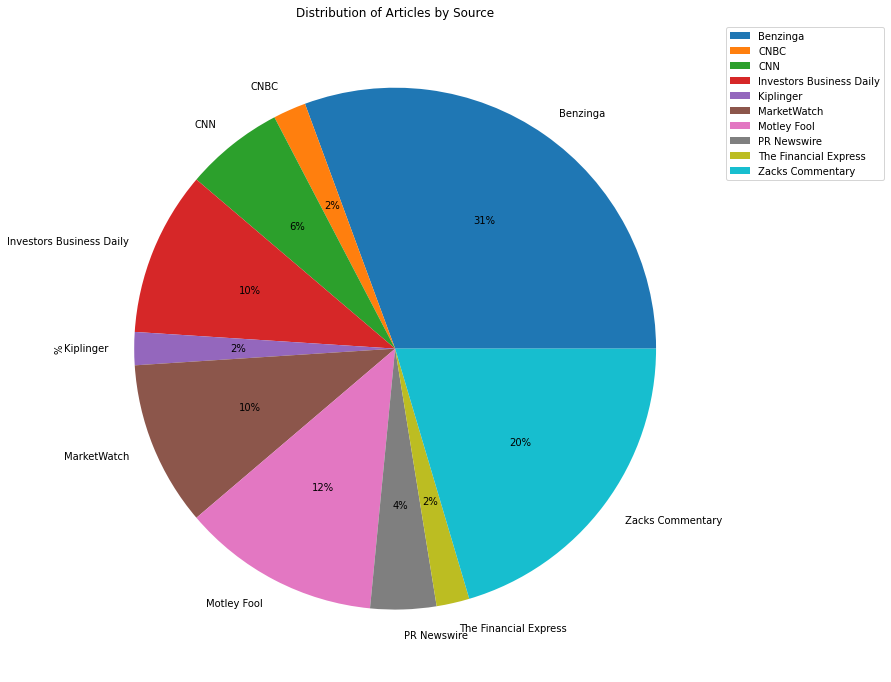

In [0]:
# Analiziranje najčešćih izvora
df_source = df.groupBy("Source").count().sort(col("count").desc())\
              .withColumn('%', col('count') / sum('count').over(Window.partitionBy()) * 100)\
              .withColumn("%", round("%", 2))
# Ovaj deo koda grupiše podatke po koloni 'Source', zatim broji pojavljivanja svakog izvora,
# sortira ih u opadajućem redosledu po broju pojavljivanja, i izračunava procentualni udeo svakog izvora u ukupnom broju članaka.

df_source = df_source.toPandas()

ax = df_source.groupby(["Source"]).sum().plot(figsize=(12,12), kind='pie', y="%", autopct='%1.0f%%', title="Distribution of Articles by Source")
# Crtanje pite koji prikazuje distribuciju članaka po izvorima.

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

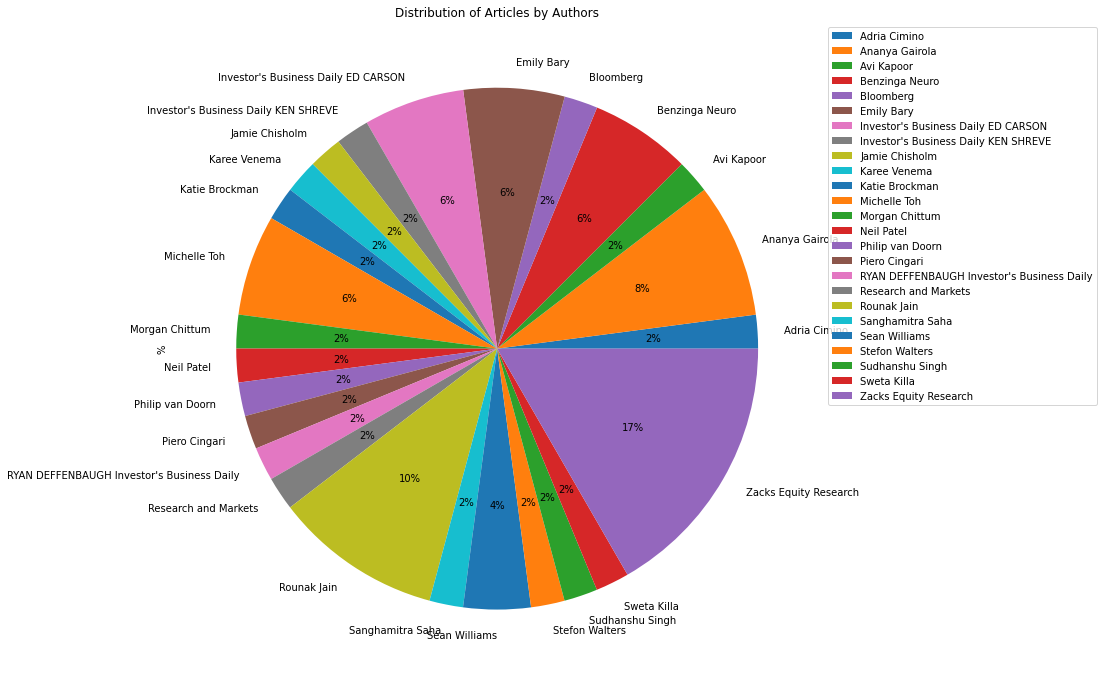

In [0]:
df_authors = df.groupBy("Authors").count().sort(col("count").desc())\
               .withColumn('%', col('count') / sum('count').over(Window.partitionBy()) * 100)\
               .withColumn("%", round("%", 2))
# Ovaj deo grupise DataFrame 'df' po koloni 'Authors', zatim broji broj pojava svakog autora,
# sortira ih u opadajućem redosledu, i računa procentualni udeo svakog autora u ukupnom broju clanaka.

df_authors = df_authors.toPandas()

ax = df_authors.groupby(["Authors"]).sum().plot(figsize=(12,12), kind='pie', y="%", autopct='%1.0f%%', title="Distribution of Articles by Authors")

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

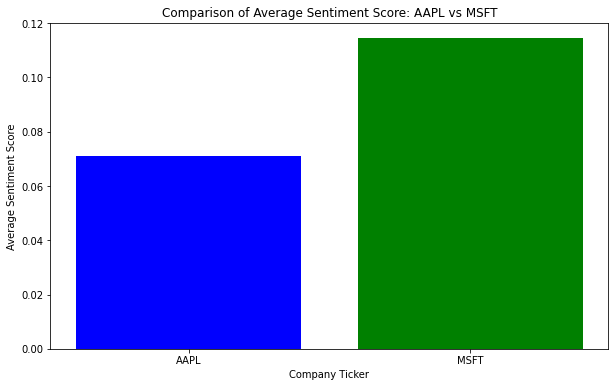

In [0]:
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import json

data = df

# Funkcija za izvlacenje sentiment skora za odredjeni ticker
def extract_ticker_sentiment(ticker_sentiments, ticker):
    try:
        ticker_sentiments = json.loads(ticker_sentiments.replace(';', ','))
        for t in ticker_sentiments:
            if t['ticker'] == ticker:
                return float(t['ticker_sentiment_score'])
    except (ValueError, SyntaxError):
        return None

# Definisanje korisnicki definisane funkcije za izvlacenje sentiment skorova
extract_sentiment_udf = udf(lambda x: extract_ticker_sentiment(x, 'AAPL'))
data = data.withColumn("AAPL_sentiment", extract_sentiment_udf(col("Ticker Sentiment")))

extract_sentiment_udf_msft = udf(lambda x: extract_ticker_sentiment(x, 'MSFT'))
data = data.withColumn("MSFT_sentiment", extract_sentiment_udf_msft(col("Ticker Sentiment")))

# Filtriranje redova gde su sentiment skorovi za AAPL i MSFT različiti od null
filtered_data = data.filter((col("AAPL_sentiment").isNotNull()) & (col("MSFT_sentiment").isNotNull()))

# Racunanje prosecnog sentiment skora za AAPL i MSFT
aapl_avg_sentiment = filtered_data.agg({"AAPL_sentiment": "avg"}).collect()[0][0]
msft_avg_sentiment = filtered_data.agg({"MSFT_sentiment": "avg"}).collect()[0][0]

# Podaci za crtanje grafikona
tickers = ['AAPL', 'MSFT']
avg_sentiments = [aapl_avg_sentiment, msft_avg_sentiment]


plt.figure(figsize=(10, 6))
plt.bar(tickers, avg_sentiments, color=['blue', 'green'])
plt.xlabel('Company Ticker')
plt.ylabel('Average Sentiment Score')
plt.title('Comparison of Average Sentiment Score: AAPL vs MSFT')
plt.show()

In [0]:
pip install wordcloud

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
pip install --upgrade pip

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
pip install --upgrade Pillow

Python interpreter will be restarted.
Python interpreter will be restarted.



## WordCloud

Word cloud vizualizuje najistaknutije teme unutar datog skupa podataka. Reci kao što su "market", "apple", "inc", "earnings", i "vision" ukazuju na to da je tekst verovatno fokusiran na finansijske izveštaje, tržište deonica ili ekonomske vesti. 
Ako se podaci azuriraju redovno, word cloud može pomoci u praćenju promena u trendovima i temama tokom vremena. 
U kombinaciji sa analizom sentimenta, word cloud može otkriti koje su pozitivne, neutralne ili negativne reči najčešće korišćene, što može ukazati na opšti sentiment u tekstualnom sadržaju

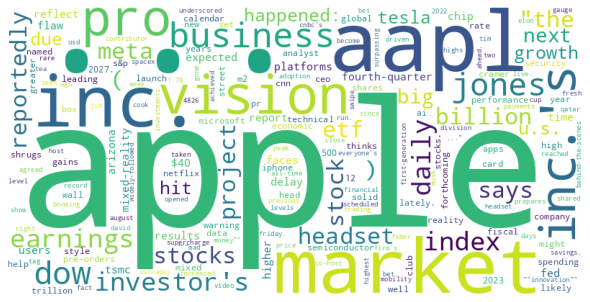

In [0]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data = spark.read.format("csv") \
  .option("inferSchema", "false") \
  .option("header", "true") \
  .load("/FileStore/tables/output-3.csv")

# Tokenizacija reci u koloni 'Summary'
tokenizer = Tokenizer(inputCol="Summary", outputCol="words")
df_words = tokenizer.transform(data)

# Uklanjanje stop reči
remover = StopWordsRemover(inputCol="words", outputCol="filtered")
df_filtered = remover.transform(df_words)

# Pretvaranje u RDD i računanje frekvencije reči
rdd = df_filtered.rdd.flatMap(lambda x: x.filtered)
word_counts = rdd.map(lambda x: (x, 1)).reduceByKey(lambda a,b: a+b).collect()

# Kreiranje Word Cloud-a
word_dict = dict(word_counts)
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(word_dict)

# Prikazivanje Word Cloud-a
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()